<a href="https://colab.research.google.com/github/arthurfg/BackuPy/blob/main/An%C3%A1lise_de_carteira_Tarc%C3%ADsio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rentabilidade da carteira x BVSP

In [ ]:
carteira1 =['IRBR3.SA','COGN3.SA','POMO4.SA','BBDC4.SA','ITUB4.SA','EMBR3.SA','AZUL4.SA','PETR4.SA','PETR3.SA','VALE3.SA']
carteira_ibov =['IRBR3.SA','COGN3.SA','POMO4.SA','BBDC4.SA','ITUB4.SA','EMBR3.SA','AZUL4.SA','PETR4.SA','PETR3.SA','VALE3.SA',"^BVSP"]
carteira2 = ['PETR4.SA','PETR3.SA','VALE3.SA','^BVSP','USDBRL=X']

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns

In [ ]:
carteira = web.get_data_yahoo(carteira1)['Adj Close']
ibov = web.get_data_yahoo('^BVSP')['Adj Close']

In [ ]:
carteira

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA
Date,,,,,,,,,,
2015-06-08,NaN,10.383077,2.354459,11.474972,13.963375,22.541027,NaN,11.661453,12.834888,17.560688
2015-06-09,NaN,10.606851,2.294086,11.408397,13.874538,22.289818,NaN,12.060372,13.308498,17.455849
2015-06-10,NaN,10.785869,2.311339,11.824710,14.280607,22.627983,NaN,12.134591,13.403220,18.530457
2015-06-11,NaN,11.161807,2.285464,11.808105,14.191778,22.656965,NaN,12.153146,13.403220,18.635294
2015-06-12,NaN,11.099153,2.302708,11.574893,14.043757,23.323633,NaN,12.078928,13.431639,18.486771
...,...,...,...,...,...,...,...,...,...,...
2020-06-01,8.31,5.630000,2.720000,19.781025,23.660000,7.410000,15.350000,20.330000,20.950001,53.419998
2020-06-02,8.60,6.400000,2.930000,20.670000,25.250000,8.240000,16.750000,21.400000,21.860001,53.419998
2020-06-03,10.75,6.780000,2.930000,21.590000,25.920000,8.520000,18.450001,21.469999,22.059999,53.660000


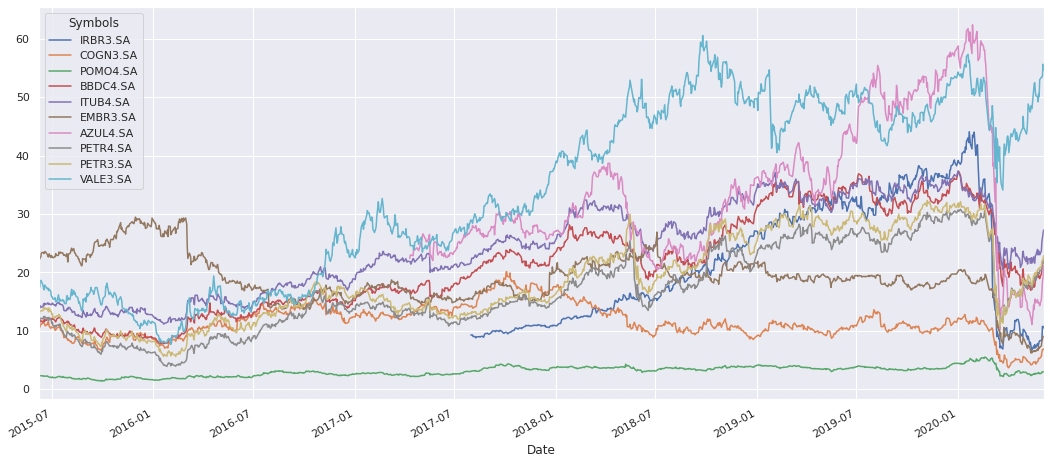

In [ ]:
sns.set()
carteira.plot(figsize=(18,8))

In [ ]:
##Normalizando dados da carteira

In [ ]:
carteira.dropna(inplace=True)

In [ ]:
carteira_normalizada = (carteira/carteira.iloc[0])*10000

In [ ]:
carteira_normalizada

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA
Date,,,,,,,,,,
2017-07-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2017-08-01,10037.558694,10033.157241,10184.035757,10122.558068,10320.349493,9961.953279,9963.370521,9872.083207,9913.043034,9923.323503
2017-08-02,10054.631577,10013.262762,10337.427133,10260.831400,10427.547254,9917.565132,10043.956353,10165.538833,10166.664904,9939.297938
2017-08-03,10017.072882,9781.166770,10337.427133,10257.551624,10403.421609,9885.859226,10271.062893,10015.050672,10014.491490,9801.917406
2017-08-04,9730.284903,9774.535724,10306.748858,10267.480203,10376.640304,10177.551363,10183.150188,10082.768643,10072.462557,9977.636186
...,...,...,...,...,...,...,...,...,...,...
2020-06-01,8971.079569,3961.771596,8992.865147,10171.770392,10973.535923,4760.633209,5622.710920,16489.025725,16026.997085,18423.793514
2020-06-02,9284.149677,4503.612447,9687.167354,10628.897921,11710.979875,5293.875487,6135.531307,17356.868940,16723.157675,18423.793514
2020-06-03,11605.186582,4771.014512,9687.167354,11101.979046,12021.726703,5473.764906,6758.242227,17413.643499,16876.159153,18506.566661


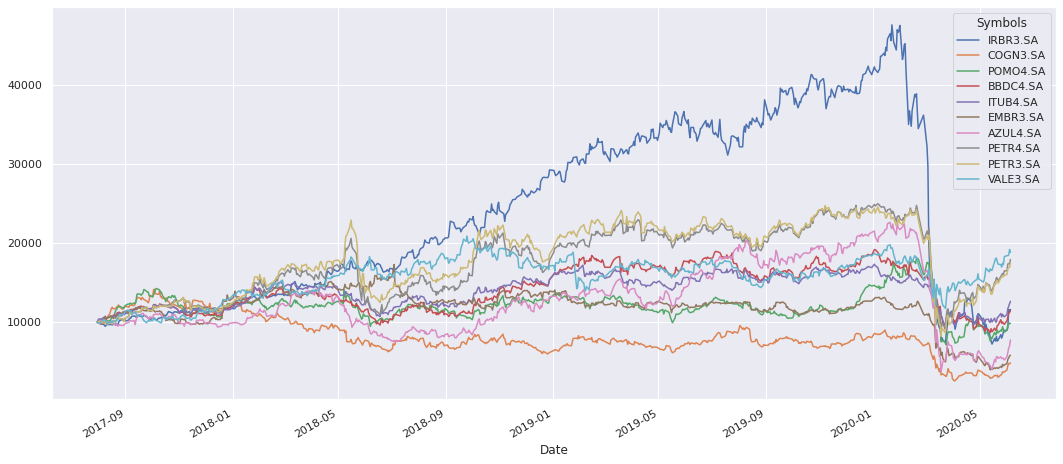

In [ ]:
carteira_normalizada.plot(figsize=(18,8))

In [ ]:
carteira_normalizada['Saldo'] = carteira_normalizada.sum(axis=1)

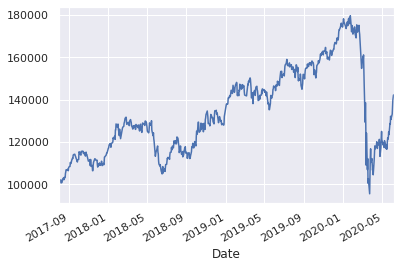

In [ ]:
ibov = ibov[ibov.index>'2017-07-31']
ibov_normalizado = (ibov / ibov.iloc[0])*100000
ibov_normalizado.plot(label= 'IBOV')


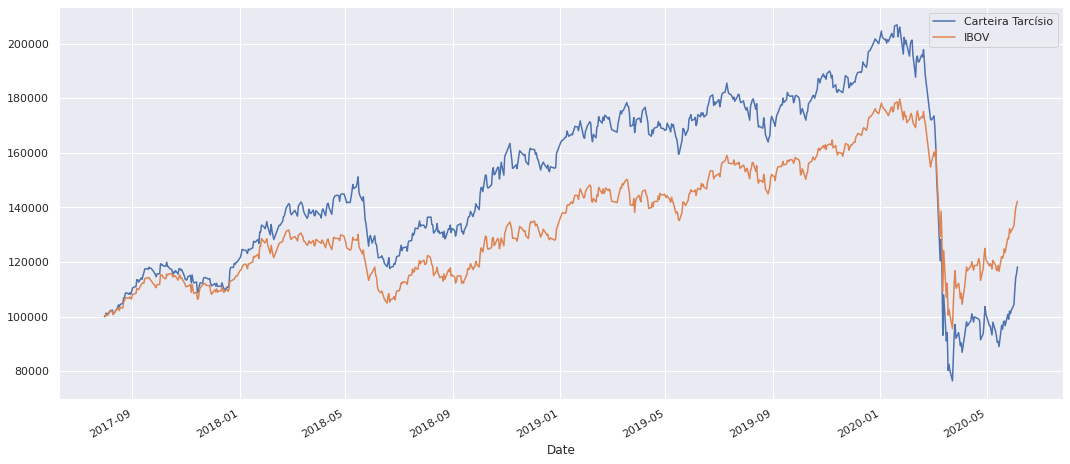

In [ ]:
carteira_normalizada['Saldo'].plot(figsize=(18,8), label='Carteira Tarcísio')
ibov_normalizado.plot(label= 'IBOV')
plt.legend()

In [ ]:
## Correlação

In [ ]:
carteira_corr = web.get_data_yahoo(carteira_ibov)['Adj Close']


Text(0.5, 1.0, 'Matriz de correlação')

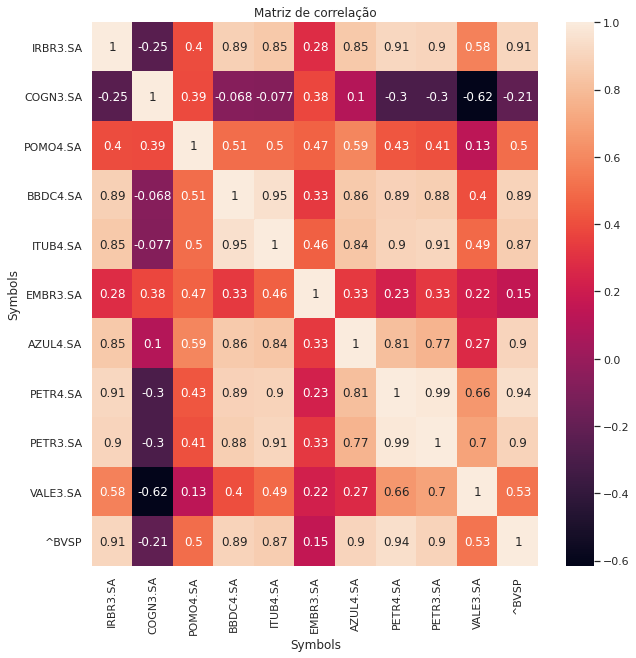

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(carteira_corr.corr(), annot=True, ax=ax)
plt.title("Matriz de correlação")

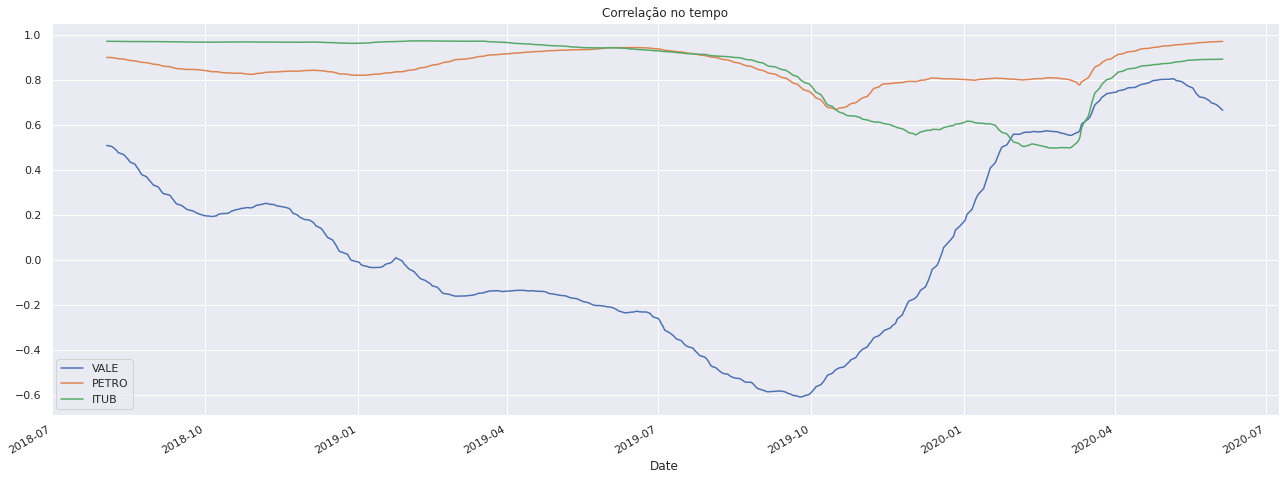

In [ ]:
carteira_corr.dropna(inplace=True)
carteira_corr['VALE3.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='VALE')
carteira_corr['PETR4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='PETRO')
carteira_corr['ITUB4.SA'].rolling(252).corr(carteira_corr['^BVSP']).plot(figsize=(22,8), label='ITUB')
plt.title("Correlação no tempo")
plt.legend()


In [ ]:
carteira_corr

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2015-06-08,NaN,10.383077,2.354459,11.474972,13.963375,22.541027,NaN,11.661453,12.834888,17.560688,52810.0
2015-06-09,NaN,10.606851,2.294086,11.408397,13.874538,22.289818,NaN,12.060372,13.308498,17.455849,52816.0
2015-06-10,NaN,10.785869,2.311339,11.824710,14.280607,22.627983,NaN,12.134591,13.403220,18.530457,53876.0
2015-06-11,NaN,11.161807,2.285464,11.808105,14.191778,22.656965,NaN,12.153146,13.403220,18.635294,53689.0
2015-06-12,NaN,11.099153,2.302708,11.574893,14.043757,23.323633,NaN,12.078928,13.431639,18.486771,53348.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,8.31,5.630000,2.720000,19.781025,23.660000,7.410000,15.350000,20.330000,20.950001,53.419998,88620.0
2020-06-02,8.60,6.400000,2.930000,20.670000,25.250000,8.240000,16.750000,21.400000,21.860001,53.419998,91046.0
2020-06-03,10.75,6.780000,2.930000,21.590000,25.920000,8.520000,18.450001,21.469999,22.059999,53.660000,93002.0


In [ ]:
## Análise de portifólio 
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [ ]:
dados = web.get_data_yahoo(carteira_ibov)['Adj Close']


In [ ]:
dados.dropna(inplace= True)

In [ ]:
retorno = dados.pct_change()

In [ ]:
retorno

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.003756,0.003316,0.018404,0.012256,0.032035,-0.003805,-0.003663,-0.012792,-0.008696,-0.007668,0.009041
2017-08-02,0.001701,-0.001983,0.015062,0.013660,0.010387,-0.004456,0.008088,0.029726,0.025585,0.001610,0.009321
2017-08-03,-0.003735,-0.023179,0.000000,-0.000320,-0.002314,-0.003197,0.022611,-0.014804,-0.014968,-0.013822,-0.005347
2017-08-04,-0.028630,-0.000678,-0.002968,0.000968,-0.002574,0.029506,-0.008559,0.006762,0.005789,0.017927,0.001812
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,0.001205,0.070342,0.030303,0.044855,0.027579,0.036364,0.074930,-0.000492,0.005278,0.007924,0.013924
2020-06-02,0.034898,0.136767,0.077206,0.044941,0.067202,0.112011,0.091205,0.052632,0.043437,0.000000,0.027375
2020-06-03,0.250000,0.059375,0.000000,0.044509,0.026535,0.033981,0.101493,0.003271,0.009149,0.004493,0.021484


In [ ]:
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0]= 1
retorno_acumulado

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-08-01,1.003756,1.003316,1.018404,1.012256,1.032035,0.996195,0.996337,0.987208,0.991304,0.992332,1.009041
2017-08-02,1.005463,1.001326,1.033743,1.026083,1.042755,0.991757,1.004396,1.016554,1.016666,0.993930,1.018447
2017-08-03,1.001707,0.978117,1.033743,1.025755,1.040342,0.988586,1.027106,1.001505,1.001449,0.980192,1.013001
2017-08-04,0.973028,0.977454,1.030675,1.026748,1.037664,1.017755,1.018315,1.008277,1.007246,0.997764,1.014836
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,0.897108,0.396177,0.899287,1.017177,1.097354,0.476063,0.562271,1.648903,1.602700,1.842379,1.344357
2020-06-02,0.928415,0.450361,0.968717,1.062890,1.171098,0.529388,0.613553,1.735687,1.672316,1.842379,1.381159
2020-06-03,1.160519,0.477101,0.968717,1.110198,1.202173,0.547376,0.675824,1.741364,1.687616,1.850657,1.410831


In [ ]:
carteira_ = 10000 * retorno_acumulado.iloc[:,:10]
carteira_['Saldo'] = carteira_.sum(axis=1)
carteira_["Retorno"] = carteira_['Saldo'].pct_change()
carteira_

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,Saldo,Retorno
Date,,,,,,,,,,,,
2017-07-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000,NaN
2017-08-01,10037.558694,10033.157241,10184.035757,10122.558068,10320.349493,9961.953279,9963.370521,9872.083207,9913.043034,9923.323503,100331.432798,0.003314
2017-08-02,10054.631577,10013.262762,10337.427133,10260.831400,10427.547254,9917.565132,10043.956353,10165.538833,10166.664904,9939.297938,101326.723285,0.009920
2017-08-03,10017.072882,9781.166770,10337.427133,10257.551624,10403.421609,9885.859226,10271.062893,10015.050672,10014.491490,9801.917406,100785.021707,-0.005346
2017-08-04,9730.284903,9774.535724,10306.748858,10267.480203,10376.640304,10177.551363,10183.150188,10082.768643,10072.462557,9977.636186,100949.258930,0.001630
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,8971.079569,3961.771596,8992.865147,10171.770392,10973.535923,4760.633209,5622.710920,16489.025725,16026.997085,18423.793514,104394.183080,0.019998
2020-06-02,9284.149677,4503.612447,9687.167354,10628.897921,11710.979875,5293.875487,6135.531307,17356.868940,16723.157675,18423.793514,109748.034198,0.051285
2020-06-03,11605.186582,4771.014512,9687.167354,11101.979046,12021.726703,5473.764906,6758.242227,17413.643499,16876.159153,18506.566661,114215.450644,0.040706


##Resultados

In [ ]:
!pip install pandas==0.25.3
import pandas as pd

     |████████████████████████████████| 10.4MB 4.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.4
    Uninstalling pandas-1.0.4:
      Successfully uninstalled pandas-1.0.4


Start date,2017-07-31
End date,2020-06-05
Total months,33
,Backtest
Annual return,6.2%
Cumulative returns,18.2%
Annual volatility,36.2%
Sharpe ratio,0.35
Calmar ratio,0.10
Stability,0.15
Max drawdown,-63.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,63.05,2020-01-20,2020-03-23,NaT,NaN
1,22.21,2018-05-16,2018-06-21,2018-10-08,104
2,11.64,2019-07-10,2019-08-26,2019-10-22,75
3,10.62,2019-03-18,2019-05-16,2019-06-21,70
4,9.14,2017-10-10,2017-11-14,2018-01-02,61


Stress Events,mean,min,max
New Normal,0.05%,-20.00%,15.93%


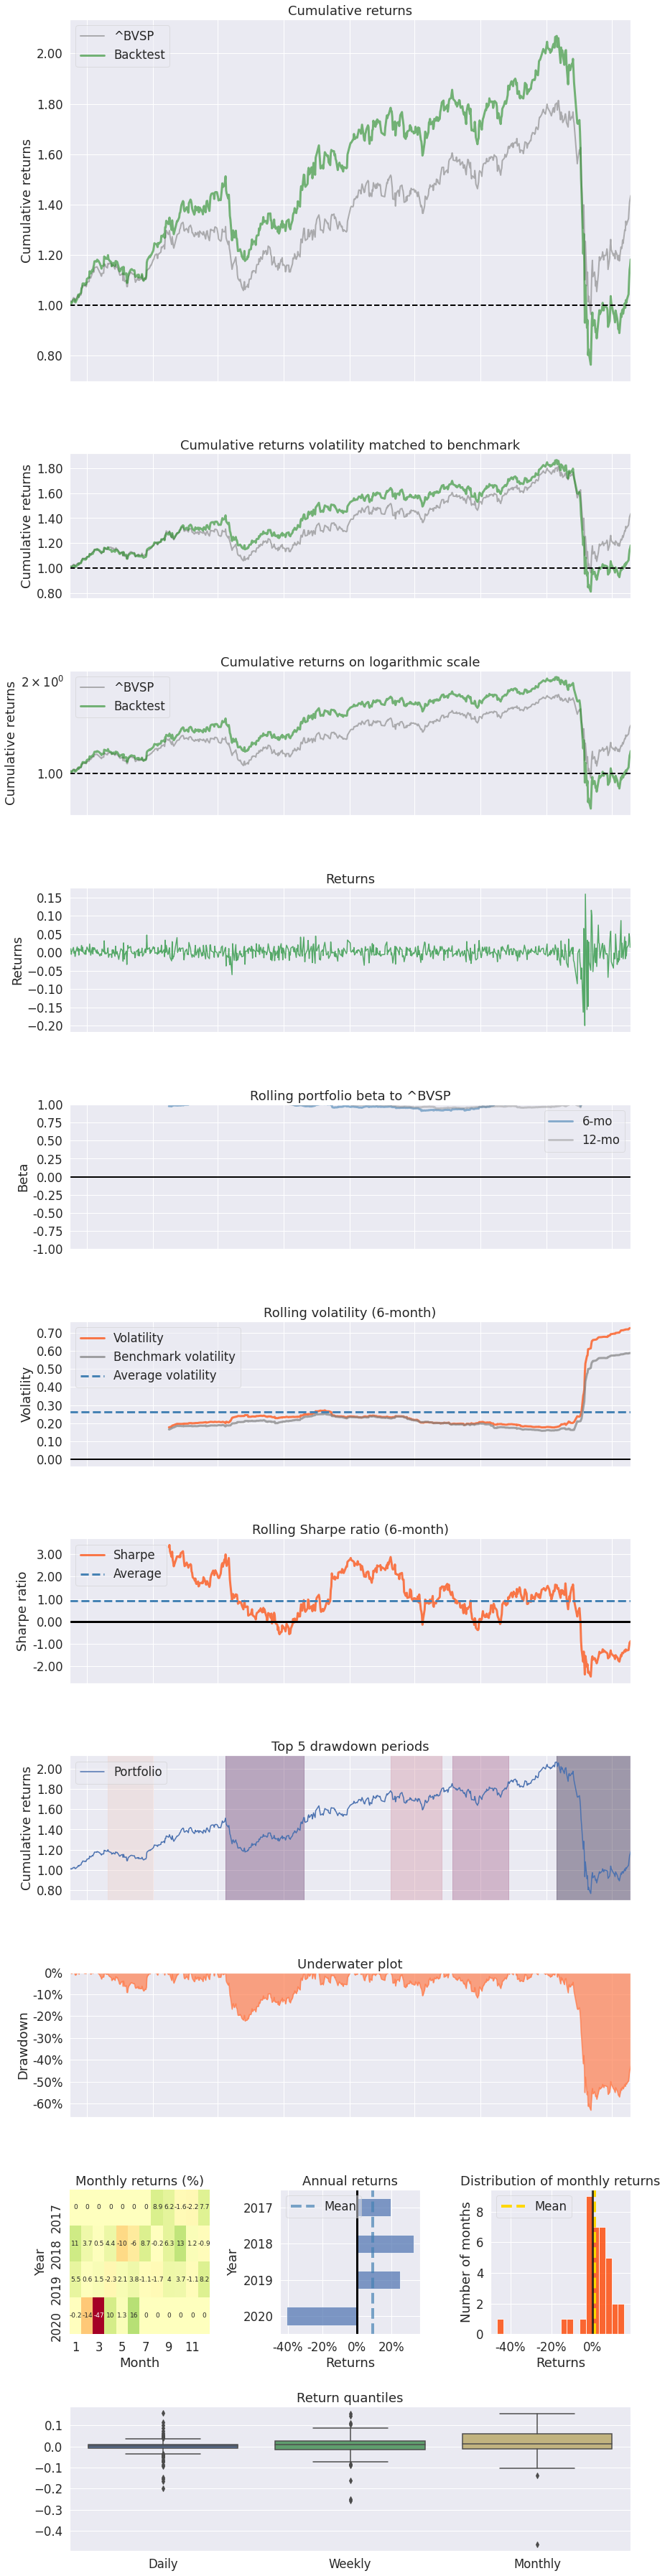

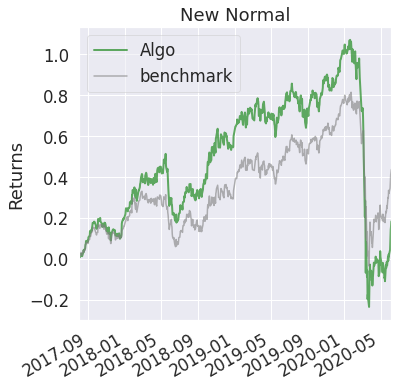

In [ ]:
pf.create_full_tear_sheet(carteira_['Retorno'], benchmark_rets=retorno['^BVSP'])

##Resultados antes do coronavirus

In [ ]:
dados_pre = web.get_data_yahoo(carteira_ibov)['Adj Close']
dados_pre.dropna(inplace=True)

In [ ]:
dados_pre = dados_pre[dados_pre.index < '2020-02-01']

In [ ]:
retorno_pre = dados_pre.pct_change()

In [ ]:
retorno_acumulado_pre = (1+retorno_pre).cumprod()
retorno_acumulado_pre.iloc[0]= 1
retorno_acumulado_pre

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,
2017-07-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-08-01,1.003756,1.003316,1.018404,1.012256,1.032035,0.996195,0.996337,0.987208,0.991304,0.992332,1.009041
2017-08-02,1.005463,1.001326,1.033743,1.026083,1.042755,0.991757,1.004396,1.016554,1.016666,0.993930,1.018447
2017-08-03,1.001707,0.978117,1.033743,1.025755,1.040342,0.988586,1.027106,1.001505,1.001449,0.980192,1.013001
2017-08-04,0.973028,0.977454,1.030675,1.026748,1.037664,1.017755,1.018315,1.008277,1.007246,0.997764,1.014836
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,4.442988,0.793762,1.635069,1.715823,1.527238,1.165424,2.105495,2.273303,2.217403,1.742018,1.736681
2020-01-28,4.698539,0.823317,1.641545,1.717868,1.526783,1.169278,2.286081,2.335751,2.269489,1.765815,1.766975
2020-01-29,4.665668,0.823317,1.592978,1.693327,1.503076,1.167993,2.193040,2.339806,2.259072,1.750295,1.750379


In [ ]:
carteira_pre = 10000 * retorno_acumulado_pre.iloc[:,:10]
carteira_pre['Saldo'] = carteira_pre.sum(axis=1)
carteira_pre["Retorno"] = carteira_pre['Saldo'].pct_change()
carteira_pre

Symbols,IRBR3.SA,COGN3.SA,POMO4.SA,BBDC4.SA,ITUB4.SA,EMBR3.SA,AZUL4.SA,PETR4.SA,PETR3.SA,VALE3.SA,Saldo,Retorno
Date,,,,,,,,,,,,
2017-07-31,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000,NaN
2017-08-01,10037.558694,10033.157241,10184.035757,10122.558068,10320.349493,9961.953279,9963.370521,9872.083207,9913.043034,9923.323503,100331.432798,0.003314
2017-08-02,10054.631577,10013.262762,10337.427133,10260.831400,10427.547254,9917.565132,10043.956353,10165.538833,10166.664904,9939.297938,101326.723285,0.009920
2017-08-03,10017.072882,9781.166770,10337.427133,10257.551624,10403.421609,9885.859226,10271.062893,10015.050672,10014.491490,9801.917406,100785.021707,-0.005346
2017-08-04,9730.284903,9774.535724,10306.748858,10267.480203,10376.640304,10177.551363,10183.150188,10082.768643,10072.462557,9977.636186,100949.258930,0.001630
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,44429.881240,7937.616631,16350.692281,17158.227587,15272.382170,11654.235531,21054.945476,22733.025142,22174.025556,17420.176177,196185.207791,-0.035343
2020-01-28,46985.392045,8233.166247,16415.447807,17178.679106,15267.828092,11692.784051,22860.806444,23357.512798,22694.890406,17658.148152,202344.655148,0.031396
2020-01-29,46656.675998,8233.166247,15929.783727,16933.268732,15030.761258,11679.934544,21930.403152,23398.064065,22590.717727,17502.949324,199885.724775,-0.012152


In [ ]:
pf.create_full_tear_sheet(carteira_pre['Retorno'], benchmark_rets=retorno_pre['^BVSP'])

NameError: ignored

In [ ]:
print("Teste")

Teste
